In [1]:
from powerspectra import Powerspectra
from modecoupling import Modecoupling
import matplotlib.pyplot as plt
import matplotlib
from cosmology import Cosmology
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

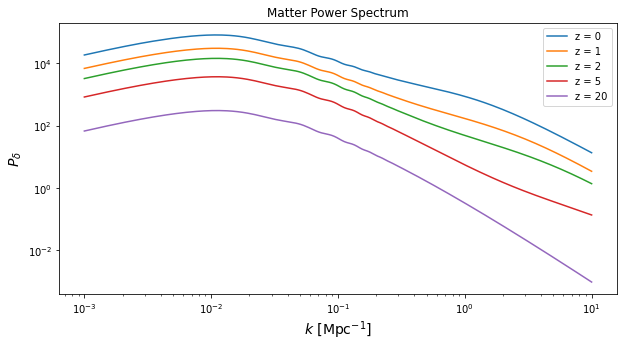

In [3]:
# Matter Powe Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("matter", z, ks)
    plt.loglog(ks, ps, label=f"z = {z}")
    plt.ylabel("$P_{\delta}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Matter Power Spectrum")
plt.legend()
plt.show()

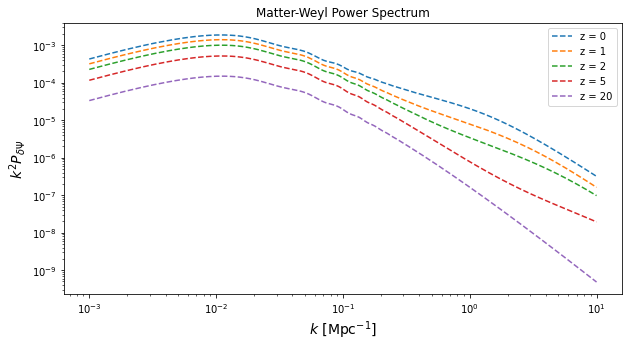

In [4]:
# Matter-Weyl Power Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("matter-weyl", z, ks)
    plt.loglog(ks, np.abs(ps), linestyle="--", label=f"z = {z}")
    plt.ylabel("$k^2P_{\delta\Psi}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Matter-Weyl Power Spectrum")
plt.legend()
plt.show()

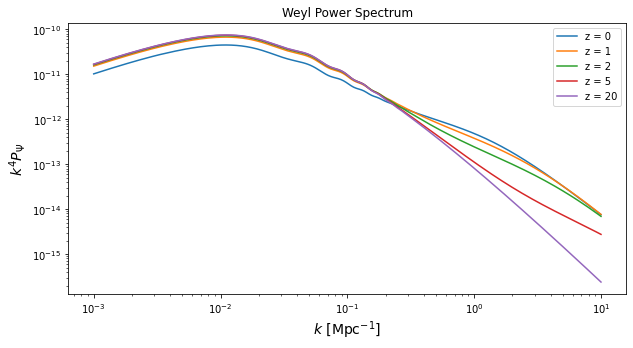

In [5]:
# Weyl Potential Power Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("weyl", z, ks)
    plt.loglog(ks, ps, label=f"z = {z}")
    plt.ylabel("$k^4P_{\Psi}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Weyl Power Spectrum")
plt.legend()
plt.show()

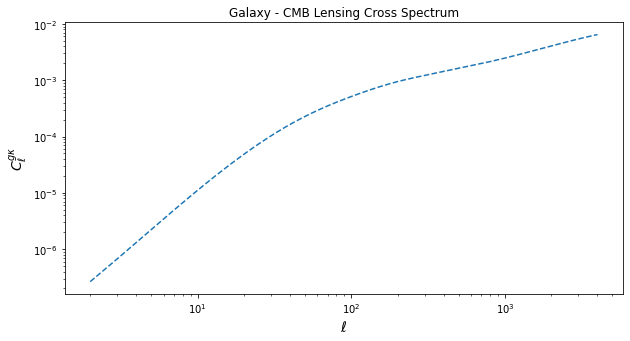

In [6]:
cosmo = Cosmology()
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_gk = power.get_gal_kappa_ps(ells, Chi_str)
plt.figure()
#plt.loglog(ells, np.abs(Cl_gk)*(ells*(ells + 1))**2/(2*np.pi))
plt.loglog(ells, np.abs(Cl_gk)*(ells*(ells + 1))/(2*np.pi), linestyle="--")
#plt.loglog(ells, np.abs(Cl_gk), linestyle="--")
plt.ylabel("$C_{\ell}^{g\kappa}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy - CMB Lensing Cross Spectrum")
plt.show()

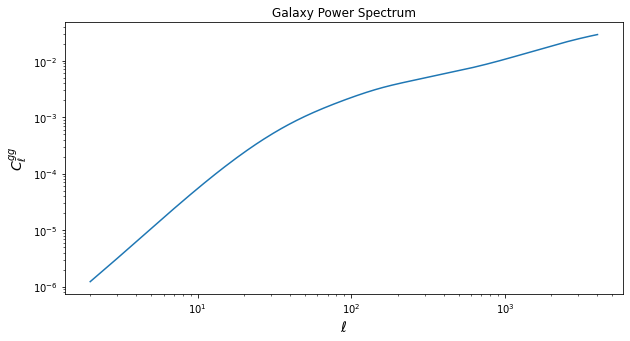

In [7]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_gg = power.get_gal_ps(ells)
plt.figure()
#plt.loglog(ells, np.abs(Cl_gg)*(ells*(ells + 1))**2/(2*np.pi))
plt.loglog(ells, Cl_gg*(ells*(ells + 1))/(2*np.pi))
#plt.loglog(ells, Cl_gg)
plt.ylabel("$C_{\ell}^{gg}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.show()

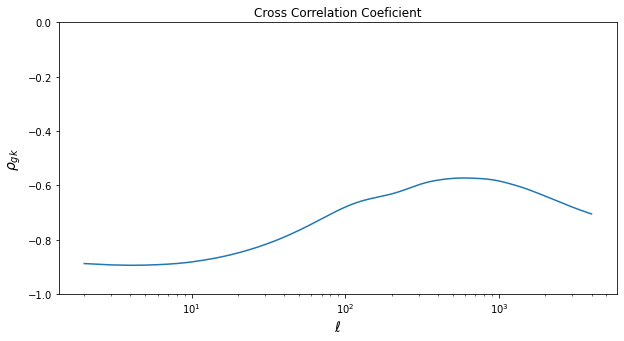

In [8]:
Cl_kk = power.get_kappa_ps(ells)
corr = Cl_gk/(np.sqrt(Cl_gg*Cl_kk))
plt.semilogx(ells, corr)
plt.ylabel(r"$\rho_{gk}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.ylim(-1, 0)
plt.title("Cross Correlation Coeficient")
plt.show()

In [9]:
print(cosmo.z_to_Chi(10))

9653.84269050133


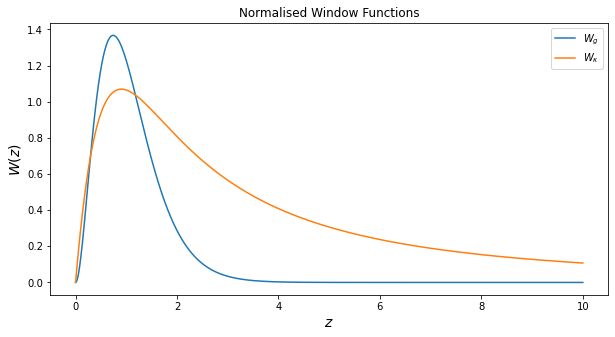

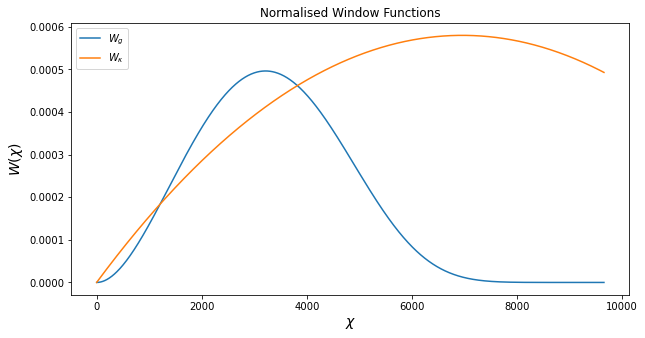

In [10]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
zs = cosmo.Chi_to_z(Chis)
gal_window_z = cosmo.gal_cluster_window_z(zs)
gal_window_Chi = cosmo.gal_cluster_window_Chi(Chis)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_z = cmb_window_Chi/cosmo.get_hubble(zs)
plt.figure()
plt.plot(zs, gal_window_z, label="$W_g$")
plt.plot(zs, Chis**2*cmb_window_z/6e6, label="$W_{\kappa}$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(z)$", fontsize=14)
plt.xlabel("$z$", fontsize=14)
plt.legend()
plt.figure()
plt.plot(Chis, gal_window_Chi, label="$W_g$")
plt.plot(Chis, Chis**2*cmb_window_Chi/6e6, label="$W_{\kappa}$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(\chi)$", fontsize=14)
plt.xlabel("$\chi$", fontsize=14)
plt.legend()
plt.show()

In [11]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kk = mode.components(ells1, ells2, Nchi=100)

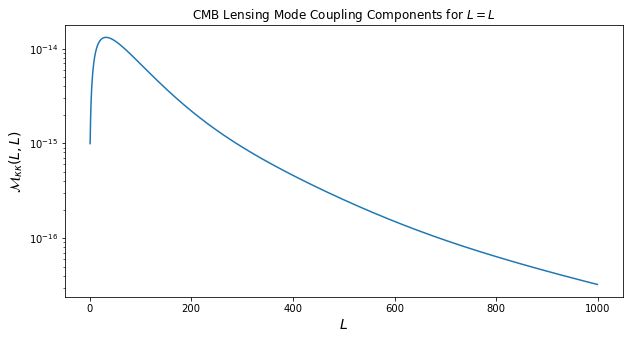

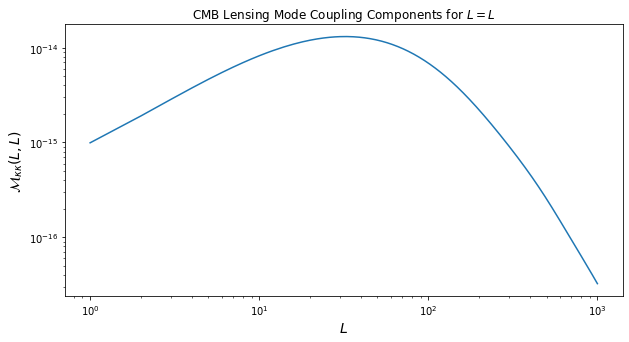

In [12]:
plt.figure()
plt.semilogy(ells1, M_kk)
plt.title("CMB Lensing Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{\kappa\kappa}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_kk)
plt.title("CMB Lensing Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{\kappa\kappa}(L,L)$", fontsize=14)

plt.show()

In [13]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_gg = mode.components(ells1, ells2, typ="gal-gal", Nchi=100)

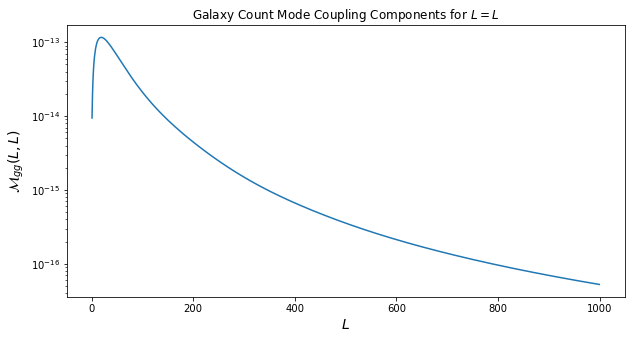

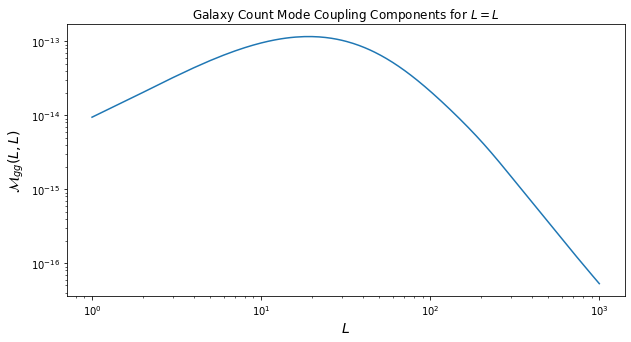

In [14]:
plt.figure()
plt.semilogy(ells1, M_gg)
plt.title("Galaxy Count Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{gg}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_gg)
plt.title("Galaxy Count Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{gg}(L,L)$", fontsize=14)

plt.show()

In [15]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_gk = mode.components(ells1, ells2, typ="gal-kappa", Nchi=100)

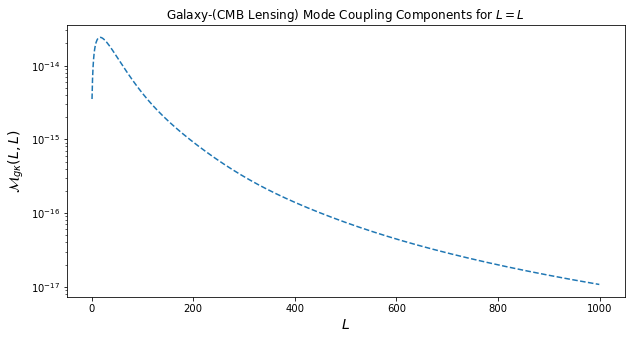

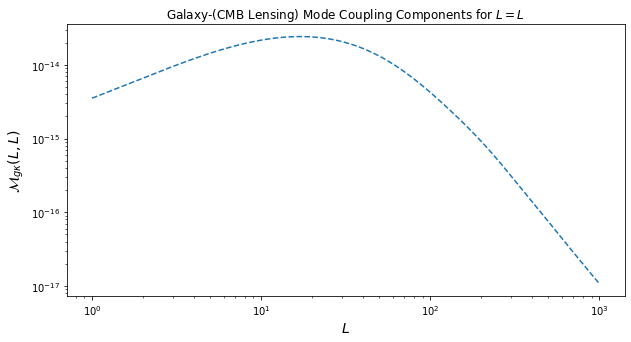

In [16]:
plt.figure()
plt.semilogy(ells1, np.abs(M_gk), linestyle="--")
plt.title("Galaxy-(CMB Lensing) Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{g\kappa}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_gk), linestyle="--")
plt.title("Galaxy-(CMB Lensing) Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{g\kappa}(L,L)$", fontsize=14)

plt.show()

In [17]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kg = mode.components(ells1, ells2, typ="kappa-gal", Nchi=100)

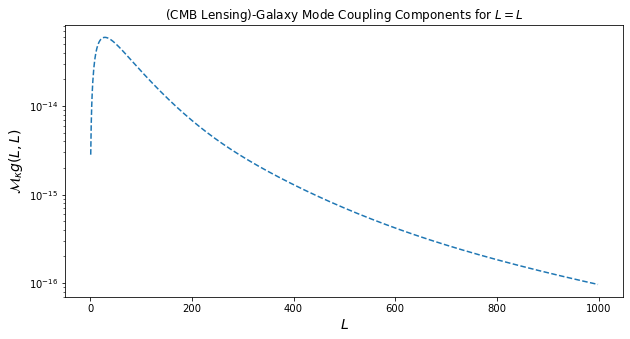

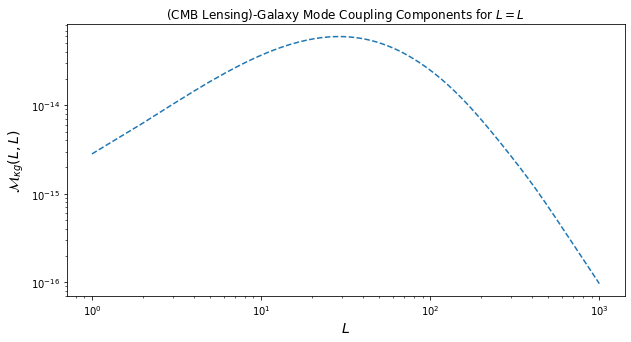

In [18]:
plt.figure()
plt.semilogy(ells1, np.abs(M_kg), linestyle="--")
plt.title("(CMB Lensing)-Galaxy Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_\kappa g(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_kg), linestyle="--")
plt.title("(CMB Lensing)-Galaxy Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{\kappa g}(L,L)$", fontsize=14)

plt.show()

In [19]:
from bispectra import Bispectra
bi = Bispectra()

In [20]:
ells1 = np.arange(2, 10001)
ells2 = ells1/2
ells3 = 1000
bi_ggw = bi.get_gal_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:37: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


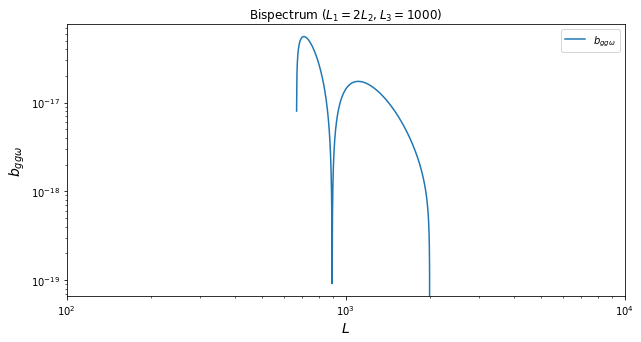

In [21]:
plt.figure()
plt.loglog(ells1, np.abs(bi_ggw), label="$b_{gg\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{gg\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:37: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


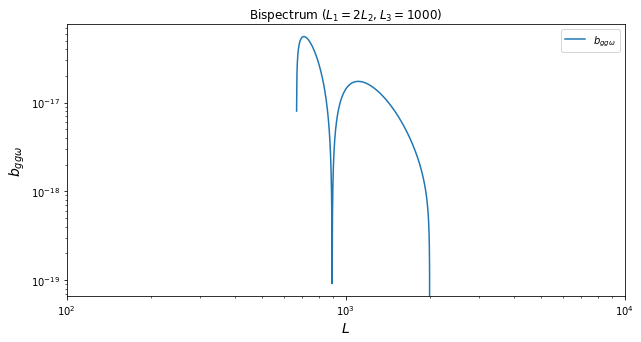

In [22]:
bi = Bispectra()
bi_ggw = bi.get_gal_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, np.abs(bi_ggw), label="$b_{gg\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{gg\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [23]:
bi_gkw = bi.get_gal_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:37: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


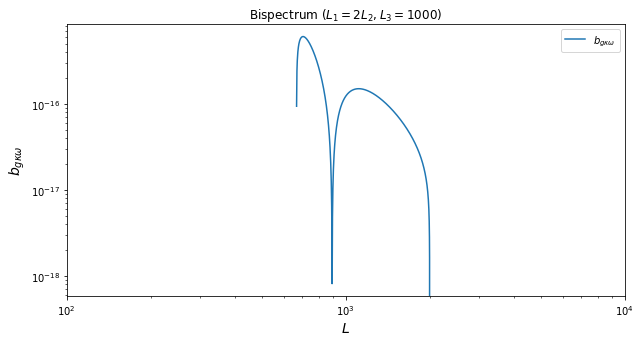

In [24]:
plt.figure()
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{g\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:37: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


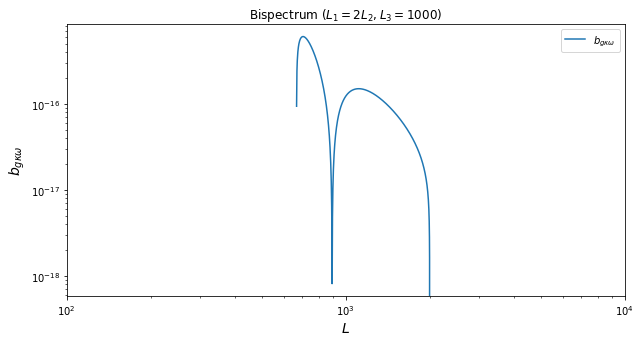

In [25]:
bi = Bispectra()
bi_gkw = bi.get_gal_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{g\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [26]:
ells2 = ells1
ells3 = ells1
bi_gkw = bi.get_gal_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)

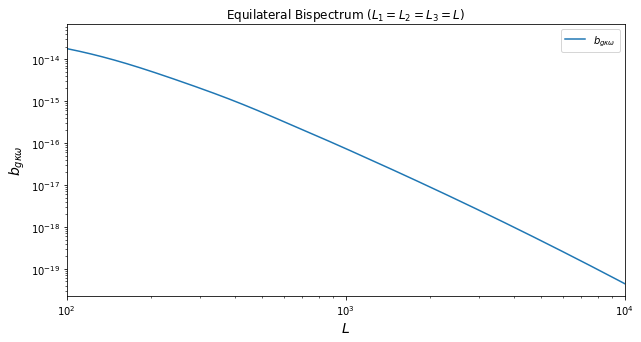

In [27]:
plt.figure()
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.title("Equilateral Bispectrum ($L_1=L_2=L_3=L$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{g\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [28]:
def get_L3s(L1, L2, steps):
    Lmin = np.floor(np.abs(L1 - L2)) + 1
    Lmax = np.ceil(L1 + L2)
    L3s = np.arange(Lmin, Lmax, steps, dtype=int)
    Lmid = L1//2
    Lrange = Lmid - L3s[0]
    return L3s[np.where(L3s <= Lmid + Lrange)]

def get_bi_slice(L1, steps, typ):
    bi_slice = np.empty((L1 + 1, L1 + 1))
    bi_slice[:] = np.nan
    L2s = np.arange(L1//2, L1 + 1, steps, dtype=int)
    for L2 in L2s:
        L3s = get_L3s(L1, L2, steps)
        if typ == "rot":
            bi_slice[L2, L3s] = bi.get_convergence_rotation_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "conv":
            bi_slice[L2, L3s] = bi.get_convergence_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "ggw":
            bi_slice[L2, L3s] = bi.get_gal_rotation_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "gkw":
            bi_slice[L2, L3s] = bi.get_gal_convergence_rotation_bispectrum(L1, L2, L3s, M_spline=True)
    return bi_slice

In [29]:
plt.rcParams['figure.figsize'] = [10,4]
def slice_plot(L1, steps, bispectrum = "rot", interpolation="nearest"):
    bi_slice = get_bi_slice(L1, steps, typ=bispectrum)
    masked_slice = np.ma.array(bi_slice, mask=np.isnan(bi_slice))
    plt.figure()
    cmap = matplotlib.cm.jet
    cmap = matplotlib.cm.get_cmap("jet").copy()
    cmap.set_bad('white',1.)
    plt.imshow(masked_slice[L1//2:, :], interpolation=interpolation, cmap=cmap, origin='lower', extent=[0, L1, L1//2, L1])
    plt.colorbar()

    x = np.arange(0,L1 + 1, steps)
    y = np.concatenate((np.arange(L1, L1//2, -steps), np.arange(L1//2, L1 + 1, steps)))
    plt.plot(x,y, linewidth=5, color='k')
    plt.xlabel("$L_3$")
    plt.ylabel("$L_2$")
    if bispectrum == "rot":
        plt.title(f"$b^{{\kappa\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "conv":
        plt.title(f"$b^{{\kappa\kappa\kappa}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "ggw":
        plt.title(f"$b^{{gg\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "gkw":
        plt.title(f"$b^{{g\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")

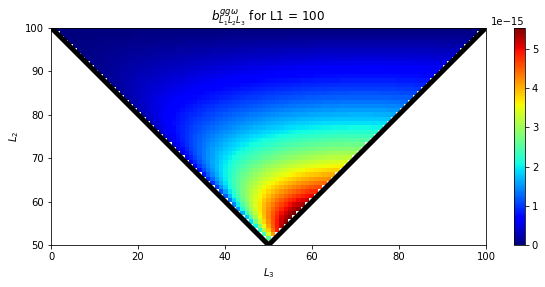

In [30]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

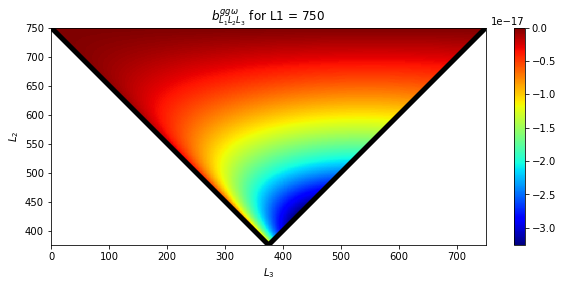

In [31]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

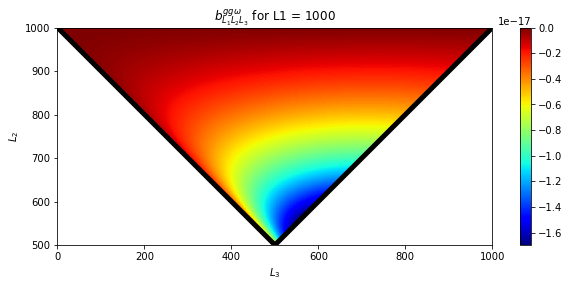

In [32]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

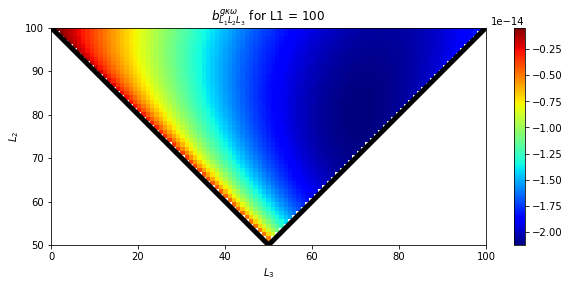

In [33]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

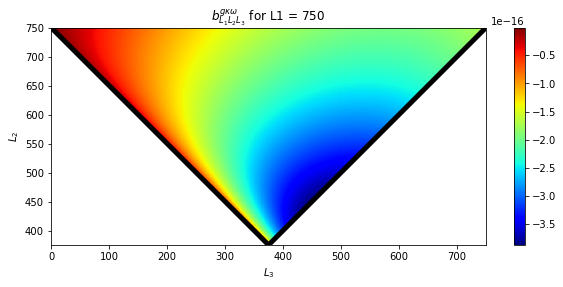

In [34]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

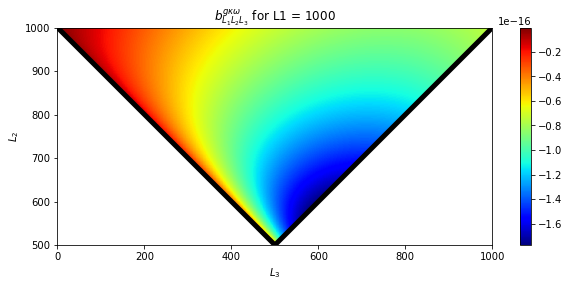

In [35]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()